<a href="https://colab.research.google.com/github/ZebaFatima639/Data-Cleaning-Data-Preprocessing/blob/main/Data_Preprocessing_Before_Building_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read dataset
df = pd.read_csv('/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#tail
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#shape
df.shape

(891, 12)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#finding missing value
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#identifying garbage value
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#identifying garbage value
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('***'*50)

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
******************************************************************************************************************************************************
Sex
male      577
female    314
Name: count, dtype: int64
************************************************************************************************************************

In [ ]:
 print(i)
 print(df[i].unique())

Embarked
['S' 'C' 'Q' nan]


In [ ]:
# EXPLORATORY DATA ANALYSIS (EDA)
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


from matplotlib import pyplot as plt
_df_12['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


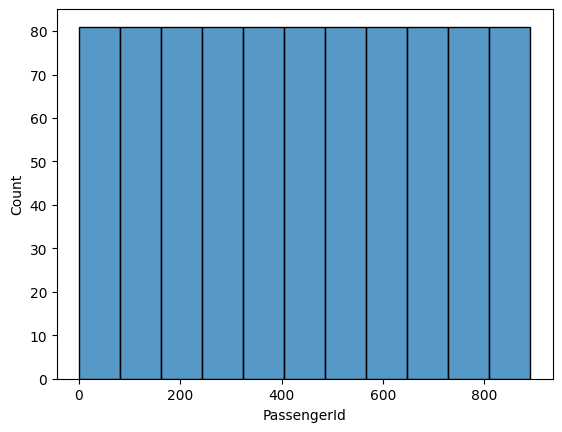

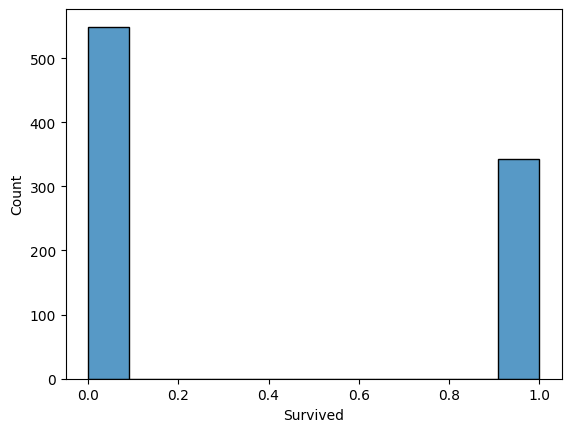

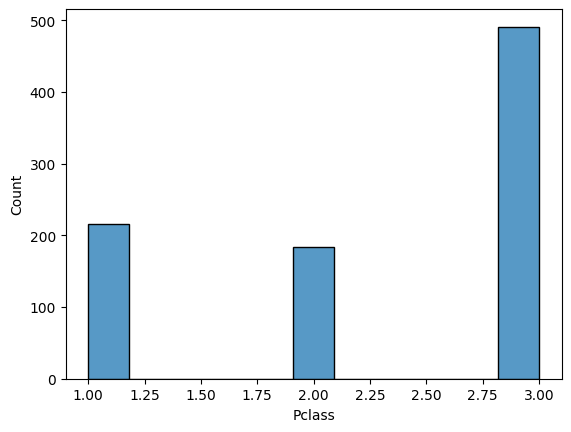

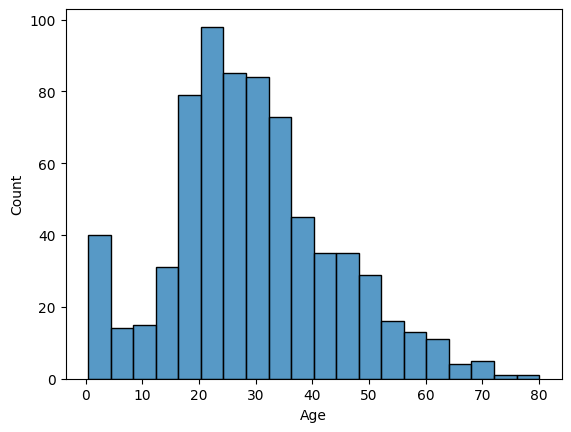

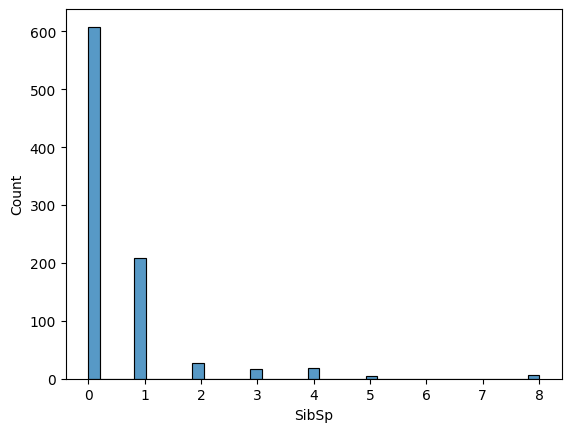

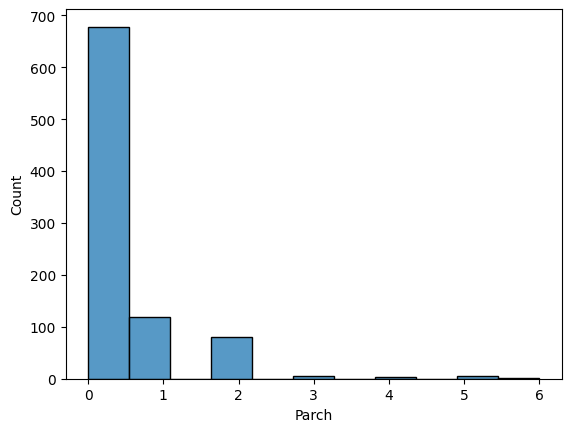

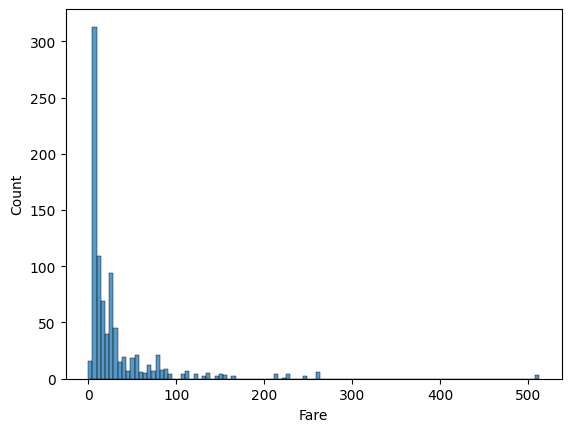

In [ ]:
#histogram to understand distribution
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

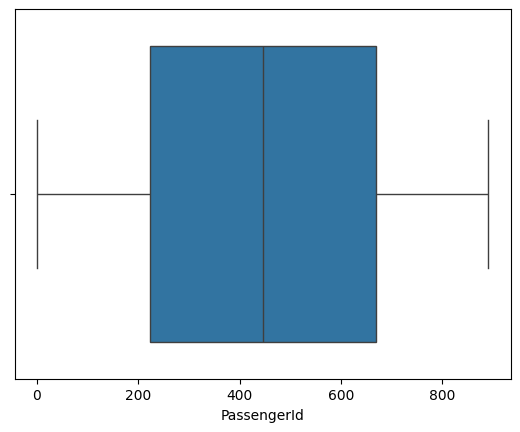

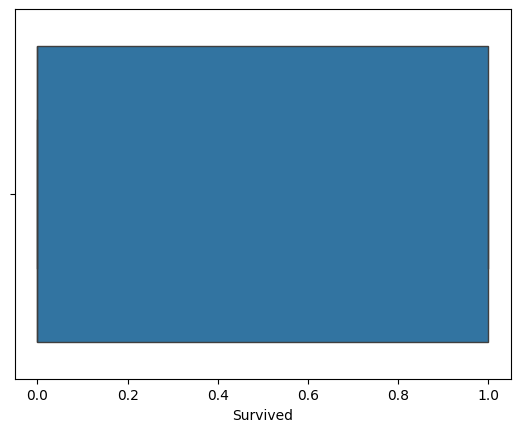

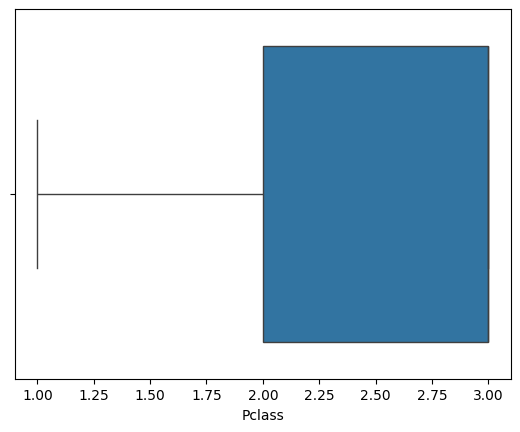

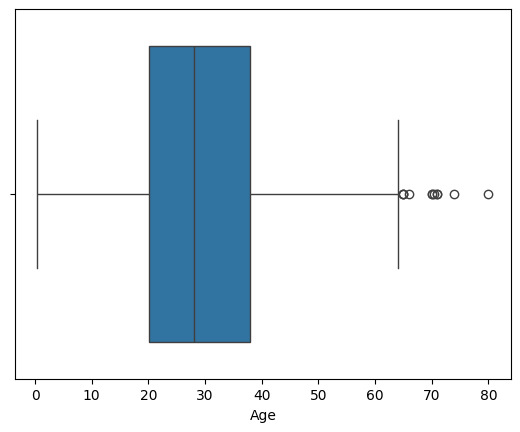

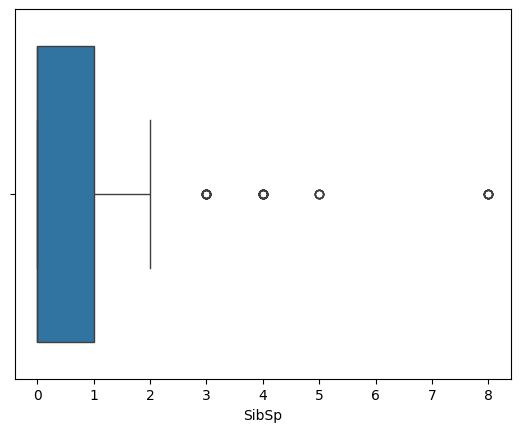

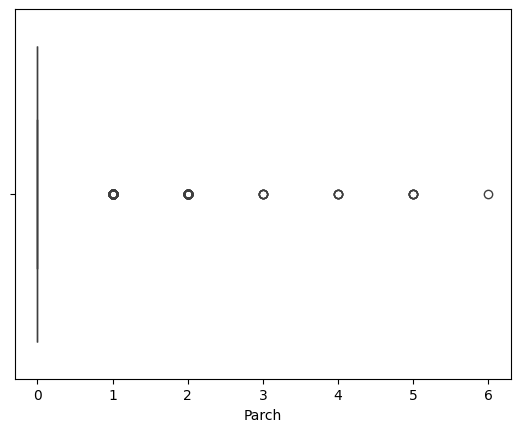

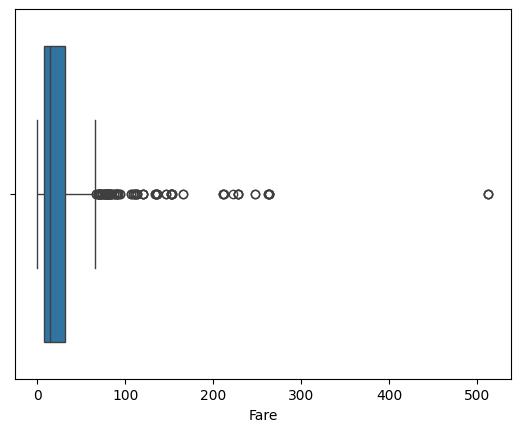

In [25]:
#boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

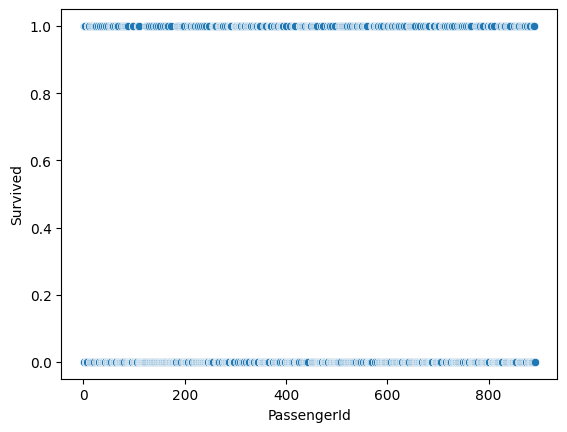

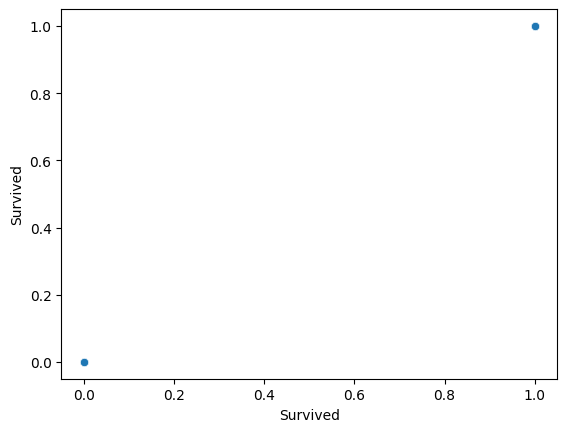

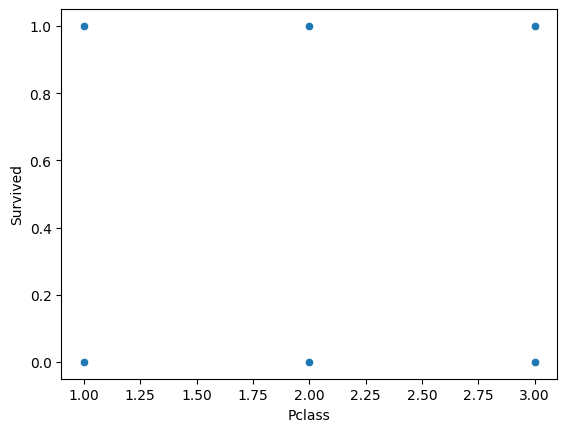

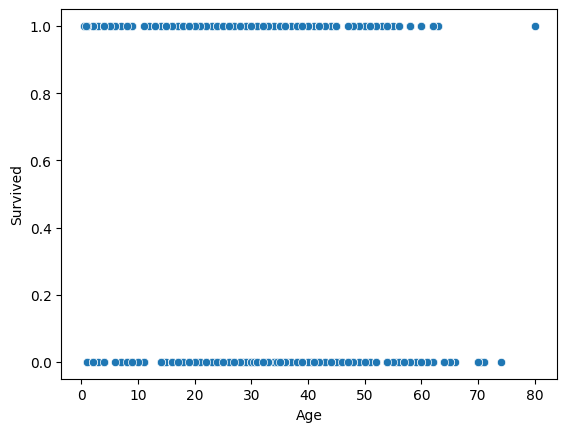

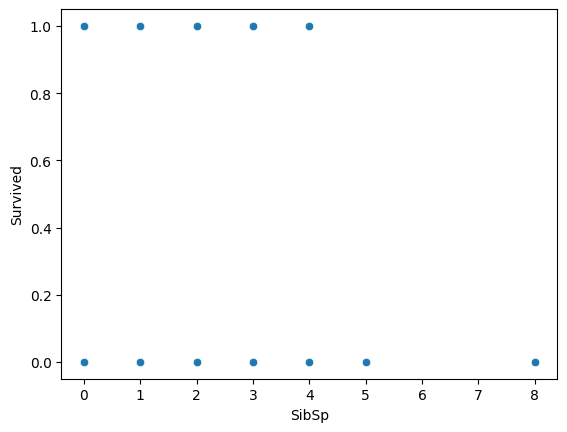

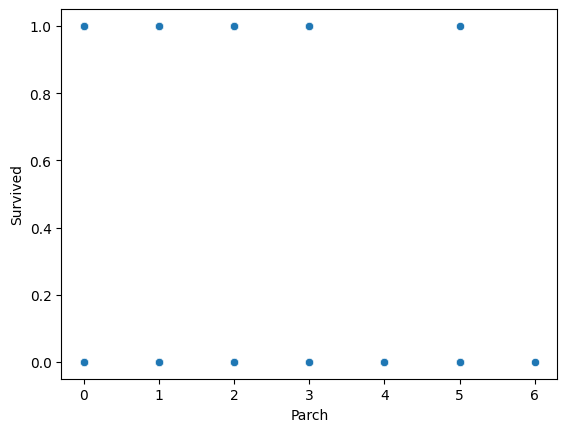

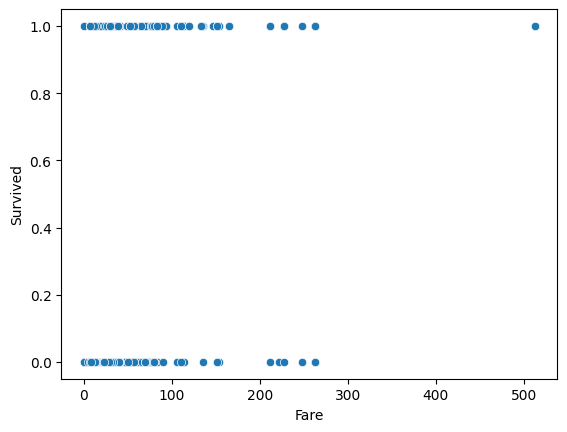

In [28]:
#scatterplot to understand the relationship
for i in df.select_dtypes(include='number').columns:
    sns.scatterplot(data=df,x=i,y='Survived')
    plt.show()

In [27]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

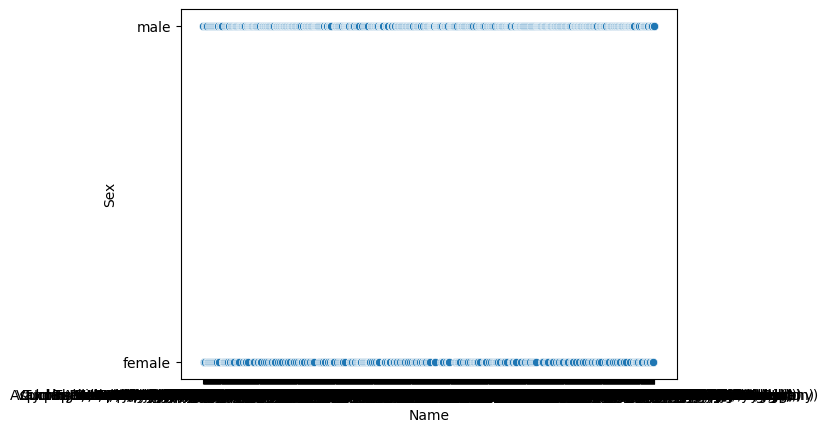

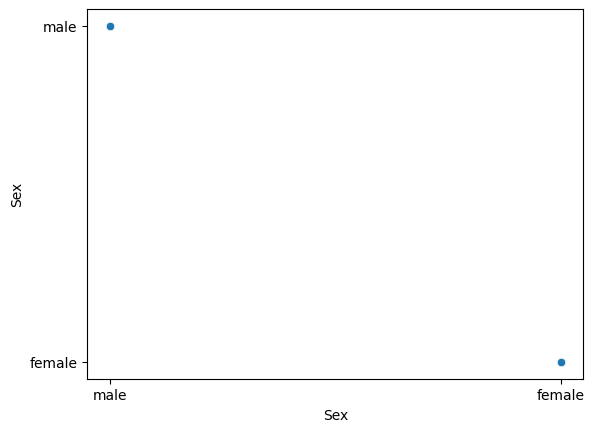

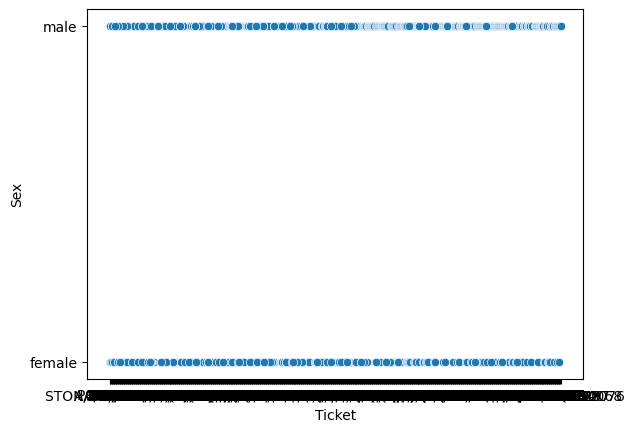

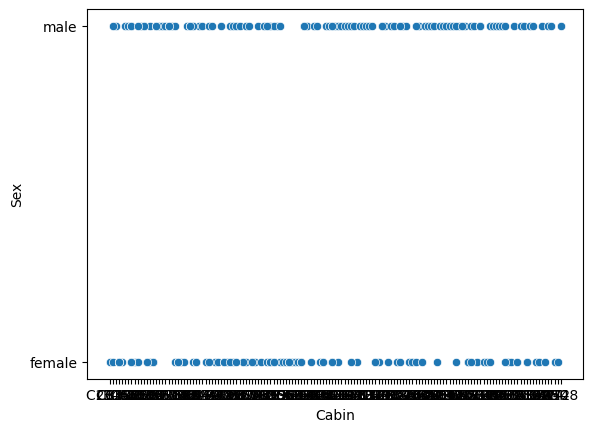

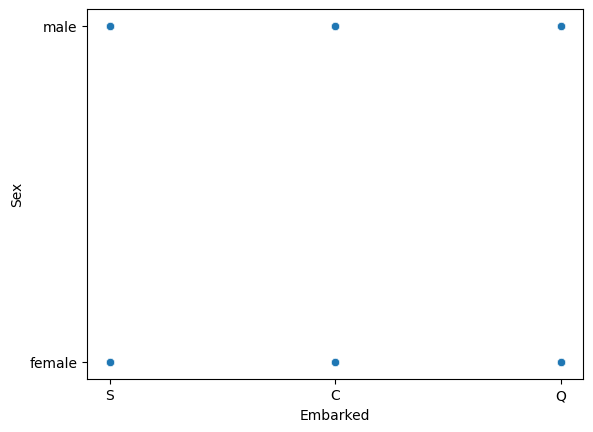

In [30]:
for i in ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    sns.scatterplot(data=df,x=i,y='Sex')
    plt.show()

In [33]:
#correlation with heatmap to interpret the relation and multicolliniarity
s = df.select_dtypes(include='number').corr()

<Axes: >

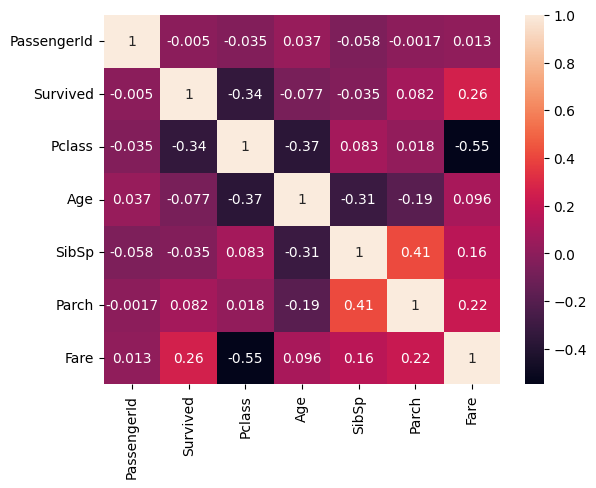

In [35]:
sns.heatmap(s,annot=True)

In [36]:
#misssing value treatments
#choose the method for imputing the missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [37]:
for i in ['Age','Cabin','Embarked']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [41]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=3)
df['Age'] = impute.fit_transform(df[['Age']])

In [43]:
for i in df.select_dtypes(include='number').columns:
    df[i] = impute.fit_transform(df[[i]])

In [44]:
#Outlier Treatments
#decide whether to do outliers treatments or not,if do how?
def wisker(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    return upper,lower


In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
wisker('Age')

(np.float64(54.5), np.float64(2.5))

In [56]:
# DUPLICATES AND GARBAGE VALUE TREATMENTS
#check for duplicate if we have an unique column in the dataset delete them
#clean the garbage values
df.drop_duplicates(inplace=True)

In [60]:
# ENCODING OF DATA
#do label encoding and one hot encoding with pd.getdummies
df = pd.get_dummies(df,columns=['Sex_male','Embarked_Q','Embarked_S'],drop_first=True)


In [61]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male_True,Embarked_Q_True,Embarked_S_True
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,True,False,True
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,C85,False,False,False
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,False,False,True
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,C123,False,False,True
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,B96 B98,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",27.0,0.0,0.0,211536,13.0000,B96 B98,True,False,True
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",19.0,0.0,0.0,112053,30.0000,B42,False,False,True
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1.0,2.0,W./C. 6607,23.4500,B96 B98,False,False,True
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",26.0,0.0,0.0,111369,30.0000,C148,True,False,False
